Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

Import dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<ul>
<li>
id: Unique ID for the customer
</li>
<li>
Gender: Gender of the customer
</li>
<li>
Age: Age of the customer
</li>
<li>
Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
</li>
<li>
Region_Code: Unique code for the region of the customer
</li>
<li>
Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
</li>
<li>
Vehicle_Age: Age of the Vehicle
</li>
<li>
Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
</li>
<li>
Annual_Premium: The amount customer needs to pay as premium in the year
</li>
<li>
Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
</li>
<li>
Vintage: Number of Days, Customer has been associated with the company
</li>
<li>
Response: [1 : Customer is interested, 0 : Customer is not interested]
</li>
</ul>

EDA

In [3]:
df.shape

(381109, 12)

In [4]:
# Checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
# Checking the distribution of target variable
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

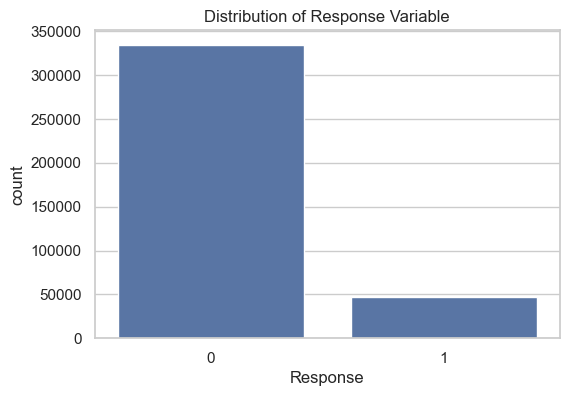

In [8]:
# Plotting the distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Response', data=df)
plt.title('Distribution of Response Variable')
plt.show()

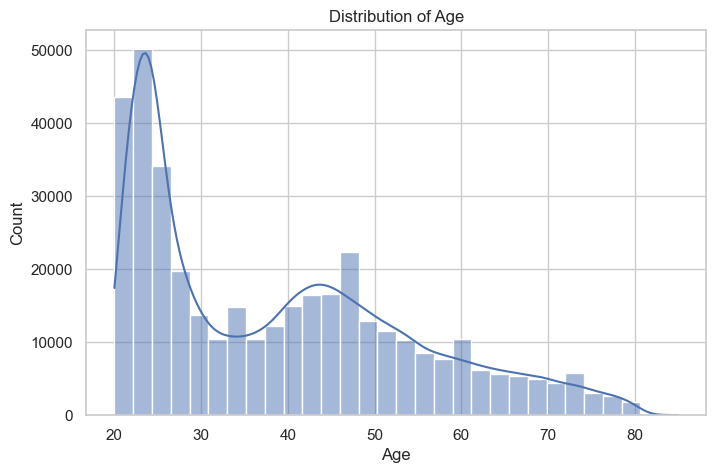

In [9]:
# Checking the distribution of age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

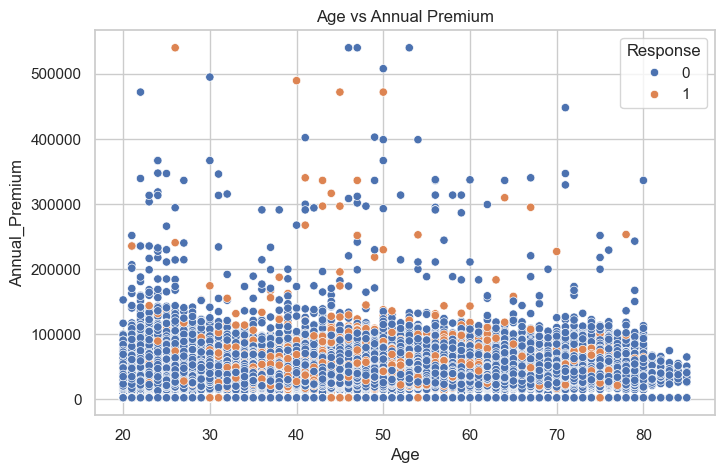

In [10]:
# Scatter plot of Age vs Annual Premium

plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Annual_Premium', data=df, hue='Response')
plt.title('Age vs Annual Premium')
plt.show()

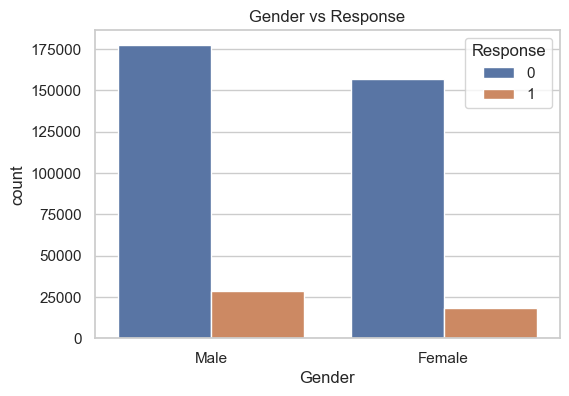

In [11]:
# Gender response comparison
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Response', data=df)
plt.title('Gender vs Response')
plt.show()

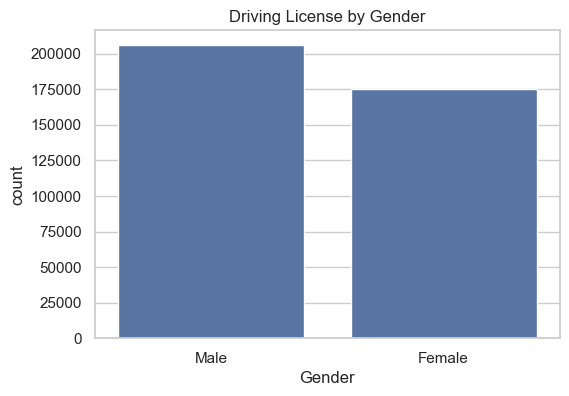

In [12]:
# driving license by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Driving License by Gender')
plt.show()

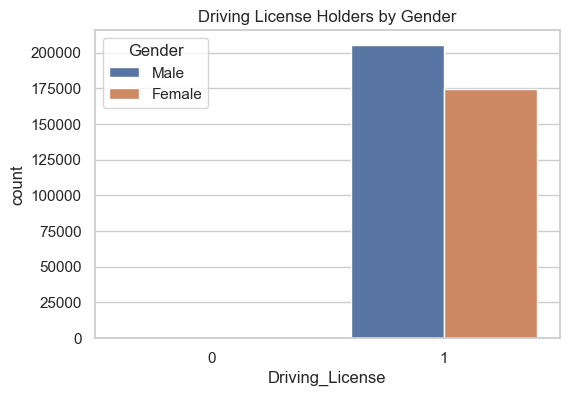

In [13]:
# Male license holders vs Female license holders
plt.figure(figsize=(6,4))
sns.countplot(x='Driving_License', hue='Gender', data=df)
plt.title('Driving License Holders by Gender')
plt.show()


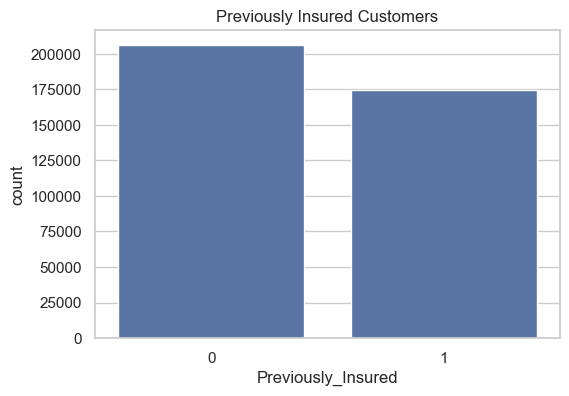

In [14]:
# customers with existing insurance

plt.figure(figsize=(6,4))
sns.countplot(x='Previously_Insured', data=df)
plt.title('Previously Insured Customers')
plt.show()

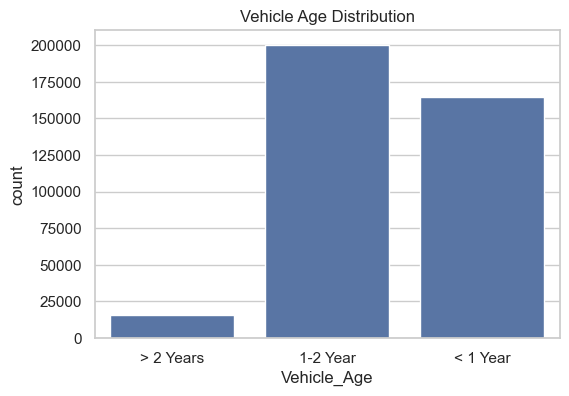

In [15]:
# checking vehicle age distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Vehicle_Age', data=df)
plt.title('Vehicle Age Distribution')
plt.show()

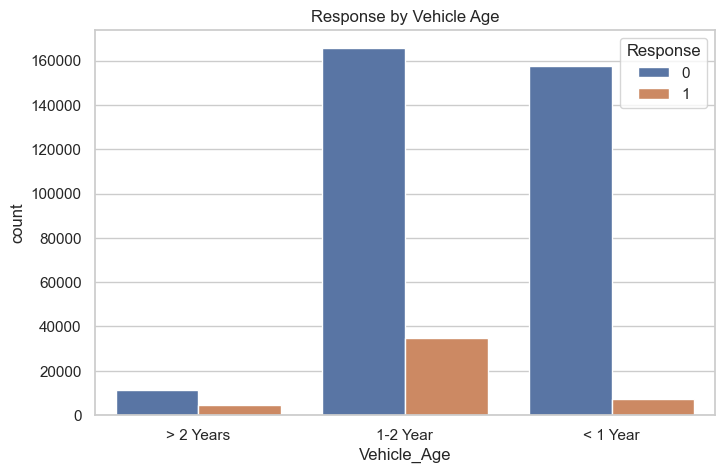

In [16]:
# Response vs Vehicle_Age
plt.figure(figsize=(8,5))
sns.countplot(x='Vehicle_Age', hue='Response', data=df)
plt.title('Response by Vehicle Age')
plt.show()

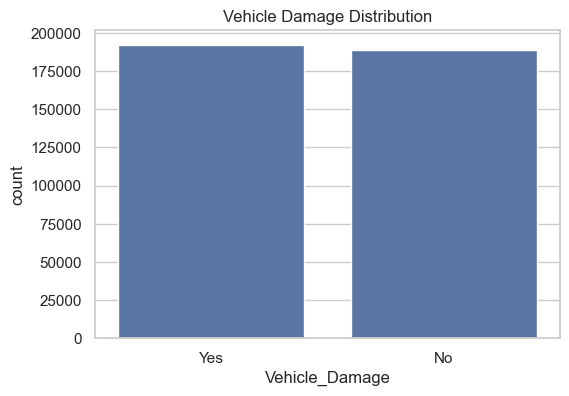

In [17]:
# dist for Vehicle_Damage column
plt.figure(figsize=(6,4))
sns.countplot(x='Vehicle_Damage', data=df)
plt.title('Vehicle Damage Distribution')
plt.show()

In [18]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

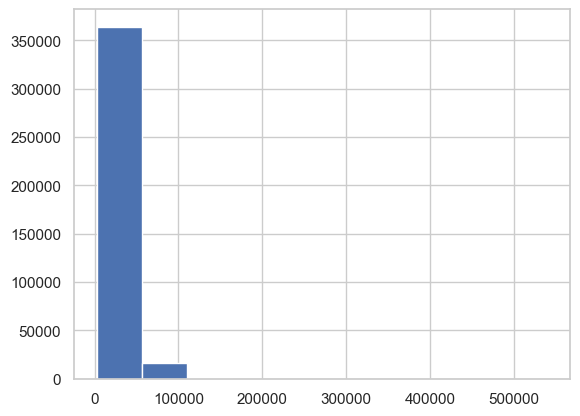

In [19]:
df['Annual_Premium'].hist(bins=10)

In [20]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


Data Preprocessing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [22]:
numerical_feat = ['Age','Vintage']
categorical_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [23]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [24]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [26]:
# creating dummy cols for categorical features
df = pd.get_dummies(df, drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [27]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [29]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in categorical_feat:
    df[column] = df[column].astype('str')

In [31]:
# Scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
df[numerical_feat] = scaler.fit_transform(df[numerical_feat])

minMaxScaler = MinMaxScaler()
df[['Annual_Premium']] = minMaxScaler.fit_transform(df[['Annual_Premium']])
id =df.id
df = df.drop('id', axis=1)


In [32]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop('Response', axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Model Trainer - Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}
clf = RandomForestClassifier(random_state=42)
model = RandomizedSearchCV(estimator=clf, param_distributions=random_search, n_iter=10, cv=4, verbose=1, random_state=101, n_jobs=-1)

model.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [37]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'gini'}


In [38]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [39]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

In [41]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

